## <b> <span style='color:#e61227'>|</span> Convolutional Neural Network for Diabetic Retinopathy Detection (Pytorch) </b> 

In [1]:
# Import essential libreries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import copy 
import os 
import torch
from PIL import Image 
from torch.utils.data import Dataset 
import torchvision
import torchvision.transforms as transforms 
from torch.optim.lr_scheduler import ReduceLROnPlateau  
import torch.nn as nn 
from torchvision import utils 
from torchvision.datasets import ImageFolder
from torchsummary import summary
import torch.nn.functional as F
from sklearn.metrics import classification_report
import itertools 
from tqdm.notebook import trange, tqdm 
from torch import optim
import warnings
warnings.filterwarnings('ignore')
from skimage.feature import hog
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random


In [2]:
# from IPython.core.display import display, HTML, Javascript

# color_map = ['#FFFFFF','#FF5733']

# prompt = color_map[-1]
# main_color = color_map[0]
# strong_main_color = color_map[1]
# custom_colors = [strong_main_color, main_color]

# css_file = '''
# div #notebook {
# background-color: white;
# line-height: 20px;
# }

# #notebook-container {
# %s
# margin-top: 2em;
# padding-top: 2em;
# border-top: 4px solid %s;
# -webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
#     box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
# }

# div .input {
# margin-bottom: 1em;
# }

# .rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
# color: %s;
# font-weight: 600;
# }

# div.input_area {
# border: none;
#     background-color: %s;
#     border-top: 2px solid %s;
# }

# div.input_prompt {
# color: %s;
# }

# div.output_prompt {
# color: %s; 
# }

# div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
# background: %s;
# }

# div.cell.selected, div.cell.selected.jupyter-soft-selected {
#     border-color: %s;
# }

# .edit_mode div.cell.selected:before {
# background: %s;
# }

# .edit_mode div.cell.selected {
# border-color: %s;

# }
# '''

# def to_rgb(h): 
#     return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

# main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
# open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, 
#                                             main_color,  main_color, prompt, main_color, main_color, 
#                                             main_color, main_color))

# def nb(): 
#     return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
# nb()


![](https://domf5oio6qrcr.cloudfront.net/medialibrary/14372/0b26ebff-2421-4333-aedc-bb17dfc37541.jpg)

## <b>1 <span style='color:#e61227'>|</span> Introduction</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.1 |</span></b> Why do we need this study?</b></p>
</div>


The prevalence of diabetic retinopathy is alarmingly high, affecting a significant proportion of individuals with long-standing diabetes. Early detection and timely treatment are crucial for preventing vision loss and improving patient outcomes. However, manual interpretation of retinal images for diabetic retinopathy screening can be time-consuming and subject to human error. Therefore, there is a pressing need for an automated and accurate tool that can assist healthcare professionals in grading the severity of diabetic retinopathy.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.2 |</span></b> Problem Statement</b></p>
</div>

The existing methods for detecting and grading **Diabetic Retinopathy** often rely on subjective assessments and extensive manual labor, leading to inefficiencies and potential inconsistencies in diagnosis. Moreover, the increasing prevalence of diabetes and the limited availability of ophthalmologists further exacerbate the challenges in timely screening and diagnosis. Therefore, there is a need to develop a robust and reliable automated system that can accurately detect and grade diabetic retinopathy, enabling early intervention and personalized treatment plans.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.3 |</span></b> Study Aim</b></p>
</div>

This project aims to employ **Convolutional Neural Networks (CNNs)** for diabetic retinopathy detection using PyTorch, a popular deep learning framework. By leveraging the power of **Deep Learning Algorithms**, we aim to develop a model that can analyze retinal images and accurately classify them based on the severity of **Diabetic Retinopathy**. This study seeks to provide an automated and efficient solution to assist healthcare professionals in diagnosing and grading diabetic retinopathy, ultimately improving patient care and reducing the risk of vision loss.

## <b>2 <span style='color:#e61227'>|</span> Dataset</b> 

**Data Description** :
This dataset consists of a large collection of high-resolution retinal images captured under various imaging conditions. A medical professional has assessed the presence of Diabetic Retinopathy in each image and assigned a rating on a scale ranging between 0 and 1, which corresponds to the following categories:

- Diabetic Retinopathy ---> **0**
- No Diabetic Retinopathy ---> **1**

## <b>3 <span style='color:#e61227'>|</span>  Data Preparation </b> 

In [2]:
# Define Transformation
transform = transforms.Compose(
    [
        transforms.Resize((255,255)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406],std = [0.229, 0.224, 0.225])
   ]
)


In [3]:
import torchvision

# Define object of the Train, Validation, and Test dataset with the local paths.
train_set = torchvision.datasets.ImageFolder("C:/Users/notan/OneDrive/Desktop/DR/Diagnosis of Diabetic Retinopathy/train", transform=transform)
train_set.transform
val_set = torchvision.datasets.ImageFolder("C:/Users/notan/OneDrive/Desktop/DR/Diagnosis of Diabetic Retinopathy/valid", transform=transform)
val_set.transform
test_set = torchvision.datasets.ImageFolder("C:/Users/notan/OneDrive/Desktop/DR/Diagnosis of Diabetic Retinopathy/test", transform=transform)
test_set.transform


Compose(
    Resize(size=(255, 255), interpolation=bilinear, max_size=None, antialias=warn)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

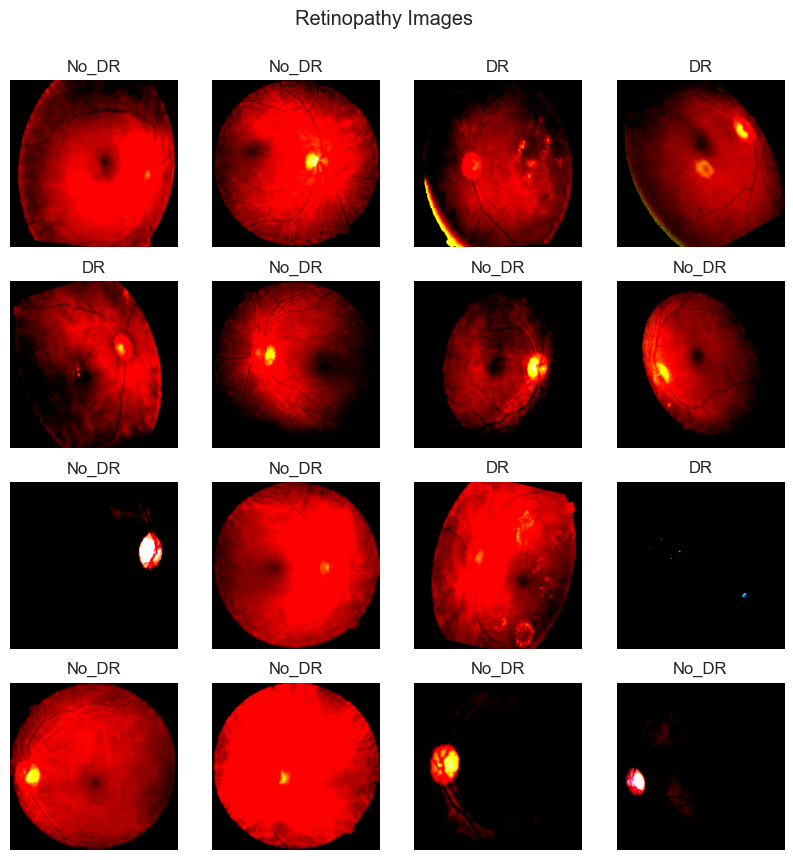

In [4]:
# Visualizing some images from Trainset
CLA_label = {
        0 : 'DR',
        1 : 'No_DR',
}
figure = plt.figure(figsize=(10, 10))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(CLA_label[label])
    plt.axis("off")
    img_np = img.numpy().transpose((1, 2, 0))
    # Clip pixel values to [0, 1]
    img_valid_range = np.clip(img_np, 0, 1)
    plt.imshow(img_valid_range)
    plt.suptitle('Retinopathy Images', y=0.95)
plt.show()

## <b>5 <span style='color:#e61227'>|</span> Creating Dataloaders</b> 

In [6]:
# Import and load Train, Validation and Test set
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, shuffle = True)

In [7]:
# Print shape of Dataset
for key, value in {'Training data': train_loader, "Validation data": val_loader}.items():
    for X, y in value:
        print(f"{key}:")
        print(f"Shape of X : {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}\n")
        break

Training data:
Shape of X : torch.Size([64, 3, 255, 255])
Shape of y: torch.Size([64]) torch.int64

Validation data:
Shape of X : torch.Size([64, 3, 255, 255])
Shape of y: torch.Size([64]) torch.int64



## <b>6 <span style='color:#e61227'>|</span> Define Diabetic Retinopathy Classifier</b> 

In [8]:
'''This function can be useful in determining the output size of a convolutional layer,
given the input dimensions and the convolutional layer's parameters.'''

def findConv2dOutShape(hin,win,conv,pool=2):
    kernel_size = conv.kernel_size
    stride=conv.stride
    padding=conv.padding
    dilation=conv.dilation

    hout=np.floor((hin+2*padding[0]-dilation[0]*(kernel_size[0]-1)-1)/stride[0]+1)
    wout=np.floor((win+2*padding[1]-dilation[1]*(kernel_size[1]-1)-1)/stride[1]+1)

    if pool:
        hout/=pool
        wout/=pool
    return int(hout),int(wout)

## <b>7 <span style='color:#e61227'>|</span> Architecture For Retinopathy Model</b> 

In [9]:
# Define Architecture For Retinopathy Model
class CNN_Retino(nn.Module):
    
    def __init__(self, params):
        
        super(CNN_Retino, self).__init__()
    
        Cin,Hin,Win = params["shape_in"]
        init_f = params["initial_filters"]
        num_fc1 = params["num_fc1"]
        num_classes = params["num_classes"]
        self.dropout_rate = params["dropout_rate"]
        
        # CNN Layers
        self.conv1 = nn.Conv2d(Cin, init_f, kernel_size=3)
        h,w=findConv2dOutShape(Hin,Win,self.conv1)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv2)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv3)
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv4)
        
        # compute the flatten size
        self.num_flatten=h*w*8*init_f
        self.fc1 = nn.Linear(self.num_flatten, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)

    def forward(self,X):
        
        X = F.relu(self.conv1(X));
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv4(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, self.num_flatten)
        X = F.relu(self.fc1(X))
        X = F.dropout(X, self.dropout_rate)
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)

## <b>8 <span style='color:#e61227'>|</span> Feature Extraction</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>8.1 |</span></b>Original RGB Image</b></p>
</div>

In [10]:
def show_original_image(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title('Original RGB Image')
    plt.axis('off')
    plt.show()


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>8.2 |</span></b>Histogram of Oriented Gradients (HOG) Feature Visualization</b></p>
</div>

In [11]:


def extract_hog_features(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    gray = color.rgb2gray(img)
    features, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Input')
    plt.subplot(1,2,2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Features')
    plt.show()
    return features


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>8.3 |</span></b>Color Histogram Feature Visualization</b></p>
</div>

In [12]:
def extract_color_histogram(img_tensor, bins=(8, 8, 8)):
    img = img_tensor.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    hist = cv2.calcHist([np.uint8(img*255)], [0, 1, 2], None, bins,
                        [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    plt.imshow(img)
    plt.title("Color Histogram Image")
    plt.axis("off")
    plt.show()
    return hist


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>8.4 |</span></b>Gabor Feature Visualization</b></p>
</div>

In [13]:
def extract_gabor_features(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    gray = cv2.cvtColor(np.uint8(img * 255), cv2.COLOR_RGB2GRAY)
    g_kernel = cv2.getGaborKernel((21, 21), 8.0, 0, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    filtered = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title("Gabor Filtered")
    plt.show()
    return filtered


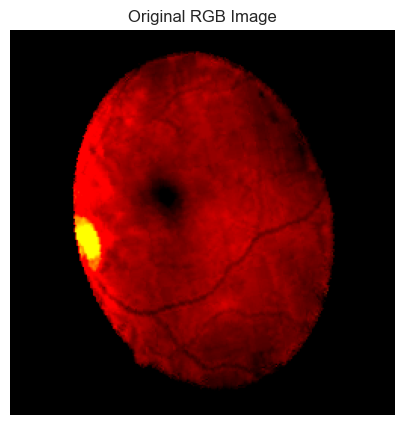

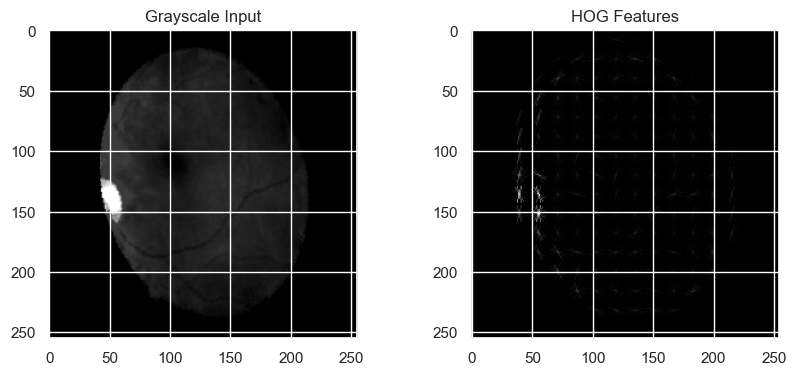

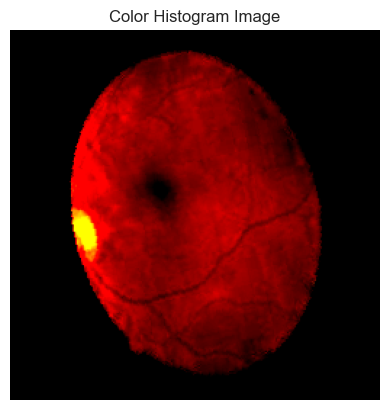

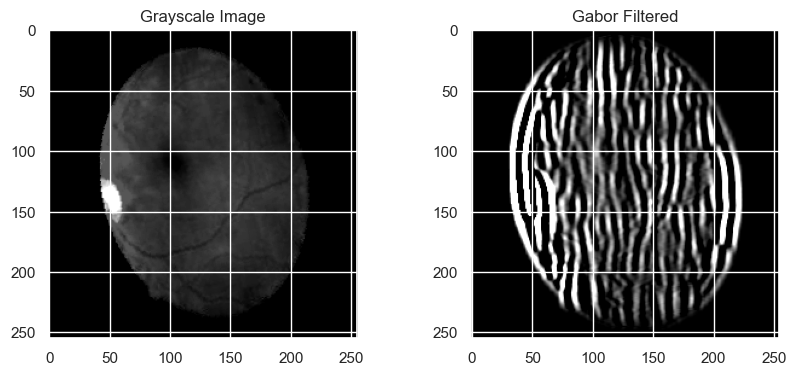

In [14]:
sample_idx = torch.randint(len(train_set), size=(1,)).item()
img, label = train_set[sample_idx]

show_original_image(img)

hog_feat = extract_hog_features(img)
color_hist = extract_color_histogram(img)
gabor_feat = extract_gabor_features(img)


## <b>9 <span style='color:#e61227'>|</span> Fisher Feature Extraction + Clustering Visualization</b> 

In [16]:

def extract_fisher_features(img_tensor, gmm_model):
    img = img_tensor.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    gray = cv2.cvtColor(np.uint8(img * 255), cv2.COLOR_RGB2GRAY)
    gray = cv2.resize(gray, (128, 128))

    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    if descriptors is None:
        return None

    probs = gmm_model.predict_proba(descriptors)
    means = gmm_model.means_
    covariances = gmm_model.covariances_

    fv = []
    for i in range(gmm_model.n_components):
        diff = descriptors - means[i]
        weighted_diff = probs[:, i][:, np.newaxis] * diff
        grad_mu = np.sum(weighted_diff / np.sqrt(covariances[i]), axis=0)
        fv.extend(grad_mu)

    return np.array(fv)

def fisher_vector_clustering(train_set, per_class=50, n_components=8, method='tsne'):
    descriptors_all = []
    fisher_vectors = []
    sample_labels = []
    class_counts = {0: 0, 1: 0}
    skipped = 0

    indices = list(range(len(train_set)))
    random.shuffle(indices)

    print("[INFO] Collecting descriptors per class...")

    for i in indices:
        if all(count >= per_class for count in class_counts.values()):
            break

        img, label = train_set[i]
        if class_counts[label] >= per_class:
            continue

        img_np = img.numpy().transpose((1, 2, 0))
        img_np = np.clip(img_np, 0, 1)
        gray = cv2.cvtColor(np.uint8(img_np * 255), cv2.COLOR_RGB2GRAY)
        gray = cv2.resize(gray, (128, 128))

        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        if descriptors is not None:
            descriptors_all.append(descriptors)
            class_counts[label] += 1

    if len(descriptors_all) == 0:
        print("[ERROR] No descriptors extracted.")
        return

    descriptors_all = np.vstack(descriptors_all)

    print("[INFO] Training GMM...")
    gmm = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
    gmm.fit(descriptors_all)

    # Reset and extract Fisher vectors again with the same balanced approach
    class_counts = {0: 0, 1: 0}
    for i in indices:
        if all(count >= per_class for count in class_counts.values()):
            break

        img, label = train_set[i]
        if class_counts[label] >= per_class:
            continue

        fv = extract_fisher_features(img, gmm)
        if fv is not None:
            fisher_vectors.append(fv)
            sample_labels.append(label)
            class_counts[label] += 1
        else:
            skipped += 1

    print(f"[INFO] Extracted {len(fisher_vectors)} Fisher vectors. Skipped {skipped} samples.")

    if len(fisher_vectors) == 0:
        print("[ERROR] No Fisher vectors were extracted.")
        return

    fisher_vectors = np.array(fisher_vectors)
    sample_labels = np.array(sample_labels)

    scaler = StandardScaler()
    fisher_vectors_scaled = scaler.fit_transform(fisher_vectors)

    print(f"[INFO] Reducing dimensions using {method.upper()}...")
    reducer = PCA(n_components=2) if method == 'pca' else TSNE(n_components=2, random_state=0, perplexity=30)
    reduced = reducer.fit_transform(fisher_vectors_scaled)

    print("[INFO] Plotting...")
    plt.figure(figsize=(8, 6))
    colors = ['#1f77b4', '#ff7f0e']
    markers = ['o', '^']

    for label in np.unique(sample_labels):
        idx = np.where(sample_labels == label)
        plt.scatter(reduced[idx, 0], reduced[idx, 1],
                    c=colors[label],
                    marker=markers[label],
                    label=f'Class {label}',
                    edgecolor='k',
                    alpha=0.8)

    plt.legend()
    plt.title(f'Fisher Vector Clustering ({per_class} per class) using {method.upper()}')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


[INFO] Collecting descriptors per class...
[INFO] Training GMM...
[INFO] Extracted 100 Fisher vectors. Skipped 3 samples.
[INFO] Reducing dimensions using TSNE...
[INFO] Plotting...


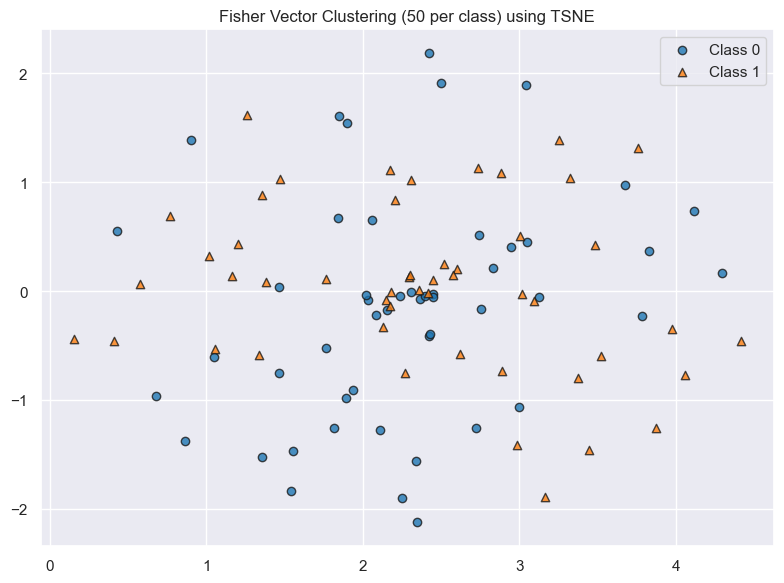

In [17]:
fisher_vector_clustering(train_set, per_class=50, n_components=8, method='tsne')


## <b>10 <span style='color:#e61227'>|</span> Fisher Vector Feature Extraction</b> 

In [18]:
def extract_fisher_features(img_tensor, gmm_model=None, n_components=8):
    # Convert to NumPy and grayscale
    img = img_tensor.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    gray = cv2.cvtColor(np.uint8(img * 255), cv2.COLOR_RGB2GRAY)

    # Extract SIFT keypoints and descriptors
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    if descriptors is None:
        print("No descriptors found!")
        return None

    # Fit or use pre-fitted GMM
    if gmm_model is None:
        gmm = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
        gmm.fit(descriptors)
    else:
        gmm = gmm_model

    # Fisher Vector encoding
    probs = gmm.predict_proba(descriptors)
    means = gmm.means_
    covariances = gmm.covariances_  # Now shape (n_components, 128)
    weights = gmm.weights_

    fv = []

    for i in range(n_components):
        diff = descriptors - means[i]  # shape (n_descriptors, 128)
        weighted_diff = probs[:, i][:, np.newaxis] * diff
        grad_mu = np.sum(weighted_diff / np.sqrt(covariances[i]), axis=0)
        fv.extend(grad_mu)

    # Visualization of keypoints
    img_with_kp = cv2.drawKeypoints(gray, keypoints, None)
    plt.imshow(img_with_kp, cmap='gray')
    plt.title("SIFT Keypoints")
    plt.axis('off')
    plt.show()

    return np.array(fv)


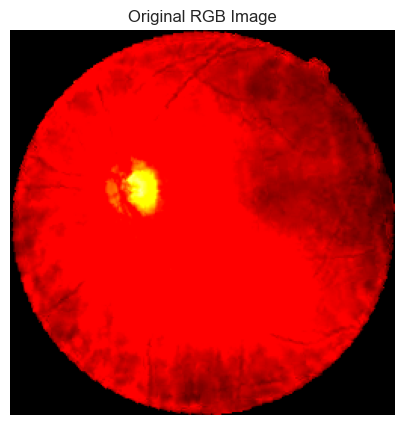

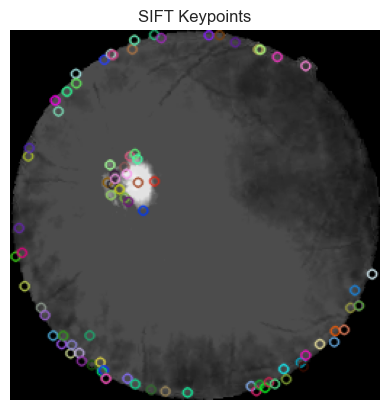

Fisher vector shape: (1024,)


In [24]:
sample_idx = torch.randint(len(train_set), size=(1,)).item()
img, label = train_set[sample_idx]

show_original_image(img)

fisher_vec = extract_fisher_features(img)
print("Fisher vector shape:", fisher_vec.shape if fisher_vec is not None else "No features")


In [20]:
params_model={
        "shape_in": (3,255,255), 
        "initial_filters": 8,    
        "num_fc1": 100,
        "dropout_rate": 0.15,
        "num_classes": 2}

# Create instantiation of Network class
Retino_model = CNN_Retino(params_model)

# define computation hardware approach (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Retino_model = Retino_model.to(device)

In [21]:
# Model Summary for CNN_Retino
summary(Retino_model, input_size=(3, 255, 255),device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 253, 253]             224
            Conv2d-2         [-1, 16, 124, 124]           1,168
            Conv2d-3           [-1, 32, 60, 60]           4,640
            Conv2d-4           [-1, 64, 28, 28]          18,496
            Linear-5                  [-1, 100]       1,254,500
            Linear-6                    [-1, 2]             202
Total params: 1,279,230
Trainable params: 1,279,230
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.74
Forward/backward pass size (MB): 7.05
Params size (MB): 4.88
Estimated Total Size (MB): 12.67
----------------------------------------------------------------


## <b>11 <span style='color:#e61227'>|</span> Loss Function Definition</b> 

In [25]:
loss_func = nn.NLLLoss(reduction="sum")

## <b>12 <span style='color:#e61227'>|</span> Optimiser Definition</b> 

In [26]:
opt = optim.Adam(Retino_model.parameters(), lr=1e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

## <b>13 <span style='color:#e61227'>|</span> Training Model</b> 

In [27]:
# Function to get the learning rate
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

# Function to compute the loss value per batch of data
def loss_batch(loss_func, output, target, opt=None):
    
    loss = loss_func(output, target) # get loss
    pred = output.argmax(dim=1, keepdim=True) # Get Output Class
    metric_b=pred.eq(target.view_as(pred)).sum().item() # get performance metric
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

# Compute the loss value & performance metric for the entire dataset (epoch)
def loss_epoch(model,loss_func,dataset_dl,opt=None):
    
    run_loss=0.0 
    t_metric=0.0
    len_data=len(dataset_dl.dataset)

    # internal loop over dataset
    for xb, yb in dataset_dl:
        # move batch to device
        xb=xb.to(device)
        yb=yb.to(device)
        output=model(xb) # get model output
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt) # get loss per batch
        run_loss+=loss_b        # update running loss

        if metric_b is not None: # update running metric
            t_metric+=metric_b    
    
    loss=run_loss/float(len_data)  # average loss value
    metric=t_metric/float(len_data) # average metric value
    
    return loss, metric

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>13.1 |</span></b>Training Function</b></p>
</div>

In [28]:
def train_val(model, params, verbose=False):
    
    # Get the parameters
    epochs=params["epochs"]
    loss_func=params["f_loss"]
    opt=params["optimiser"]
    train_dl=params["train"]
    val_dl=params["val"]
    lr_scheduler=params["lr_change"]
    weight_path=params["weight_path"]
    
    # history of loss values in each epoch
    loss_history={"train": [],"val": []} 
    # histroy of metric values in each epoch
    metric_history={"train": [],"val": []} 
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict()) 
    # initialize best loss to a large value
    best_loss=float('inf') 

# Train Model n_epochs (the progress of training by printing the epoch number and the associated learning rate. It can be helpful for debugging, monitoring the learning rate schedule, or gaining insights into the training process.) 
    
    for epoch in tqdm(range(epochs)):
        
        # Get the Learning Rate
        current_lr=get_lr(opt)
        if(verbose):
            print('Epoch {}/{}, current lr={}'.format(epoch, epochs - 1, current_lr))

        
# Train Model Process

        
        model.train()
        train_loss, train_metric = loss_epoch(model,loss_func,train_dl,opt)

        # collect losses
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        

# Evaluate Model Process

        
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model,loss_func,val_dl)
        
        # store best model
        if(val_loss < best_loss):
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            # store weights into a local file
            torch.save(model.state_dict(), weight_path)
            if(verbose):
                print("Copied best model weights!")
        
        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)
        
        # learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            if(verbose):
                print("Loading best model weights!")
            model.load_state_dict(best_model_wts)

        if(verbose):
            print(f"train loss: {train_loss:.6f}, dev loss: {val_loss:.6f}, accuracy: {100*val_metric:.2f}")
            print("-"*10)

    # load best model weights
    model.load_state_dict(best_model_wts)
        
    return model, loss_history, metric_history

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>13.2 |</span></b> Training Process </b></p>
</div>

In [29]:
# Define various parameters used for training and evaluation of a cnn_model

params_train={
 "train": train_loader,"val": val_loader,
 "epochs": 60,
 "optimiser": optim.Adam(Retino_model.parameters(),lr=1e-4),
 "lr_change": ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1),
 "f_loss": nn.NLLLoss(reduction="sum"),
 "weight_path": "weights.pt",
}

# train and validate the model
model,loss_hist_m,metric_hist_m = train_val(Retino_model,params_train)

  0%|          | 0/60 [00:00<?, ?it/s]

## <b>14 <span style='color:#e61227'>|</span> Evaluation Metric Visualization</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>14.1 |</span></b> Loss and Acccuracy Of Model </b></p>
</div>

<Axes: >

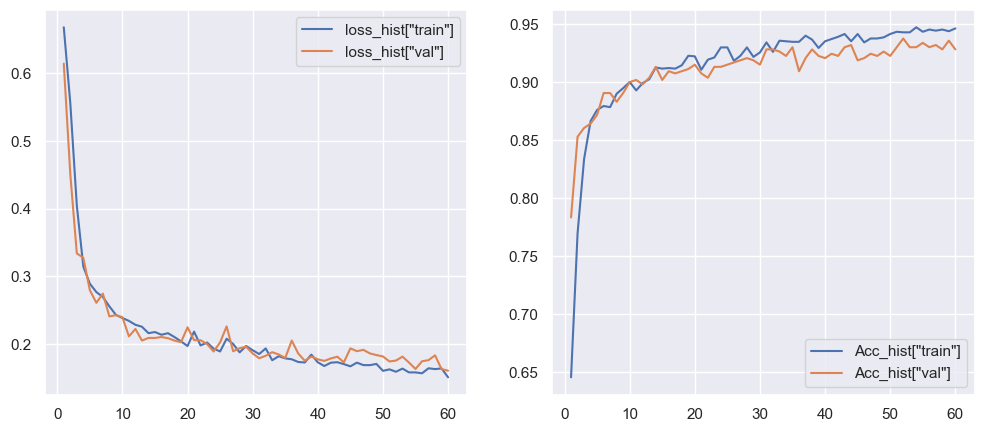

In [30]:
# Convergence History Plot
epochs=params_train["epochs"]
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.lineplot(x=[*range(1,epochs+1)],y=loss_hist_m["train"],ax=ax[0],label='loss_hist["train"]')
sns.lineplot(x=[*range(1,epochs+1)],y=loss_hist_m["val"],ax=ax[0],label='loss_hist["val"]')
sns.lineplot(x=[*range(1,epochs+1)],y=metric_hist_m["train"],ax=ax[1],label='Acc_hist["train"]')
sns.lineplot(x=[*range(1,epochs+1)],y=metric_hist_m["val"],ax=ax[1],label='Acc_hist["val"]')

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>14.2 |</span></b> Classification Report </b></p>
</div>

In [31]:
# Define Function For Classification Report
def ture_and_pred_val(val_loader, model):
    i = 0
    y_true = []
    y_pred = []
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.numpy()
        outputs = model(images)
        _, pred = torch.max(outputs.data, 1)
        pred = pred.detach().cpu().numpy()
        
        y_true = np.append(y_true, labels)
        y_pred = np.append(y_pred, pred)
    
    return y_true, y_pred


In [32]:
# Classification Report for Retinopathy Classification Model based on Train Set
y_true, y_pred = ture_and_pred_val(train_loader, Retino_model)
print(classification_report(y_true, y_pred), '\n\n')

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      1050
         1.0       0.93      0.96      0.95      1026

    accuracy                           0.95      2076
   macro avg       0.95      0.95      0.95      2076
weighted avg       0.95      0.95      0.95      2076
 




In [33]:
# # Classification Report for Retinopathy Classification Model based on Validation Set
y_true, y_pred = ture_and_pred_val(val_loader, Retino_model)
print(classification_report(y_true, y_pred), '\n\n')


              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       245
         1.0       0.92      0.94      0.93       286

    accuracy                           0.93       531
   macro avg       0.93      0.93      0.93       531
weighted avg       0.93      0.93      0.93       531
 




## <b>15<span style='color:#e61227'>|</span> Save Model </b>

In [34]:
torch.save(Retino_model, "Retino_model.pt")

## <b>16<span style='color:#e61227'>|</span> Detection Retinopathy By Real Image</b>

In [35]:
# Load the pretrained model
model = torch.load("Retino_model.pt")

# Move the model to the GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Iterate over the test loader for prediction
with torch.no_grad():
    for images, _ in test_loader:
        
        images = images.to(device)
        output = model(images)
        probabilities = torch.softmax(output, dim=1)
        predicted_classes = torch.argmax(probabilities, dim=1)
        
        for predicted_class in predicted_classes:
            print("Predicted class:", predicted_class.item())

Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 1
Predicted class: 0
Predicted class: 0
Predicted cl

In [36]:
## Classification Report for Retinopathy Classification Model based on Test set
y_true, y_pred = ture_and_pred_val(test_loader, model)
print(classification_report(y_true, y_pred), '\n\n')

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       113
         1.0       0.93      0.97      0.95       118

    accuracy                           0.95       231
   macro avg       0.95      0.95      0.95       231
weighted avg       0.95      0.95      0.95       231
 




Classification Report:

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       113
         1.0       0.94      0.98      0.96       118

    accuracy                           0.96       231
   macro avg       0.96      0.96      0.96       231
weighted avg       0.96      0.96      0.96       231

Confusion Matrix:
 [[105   8]
 [  2 116]]


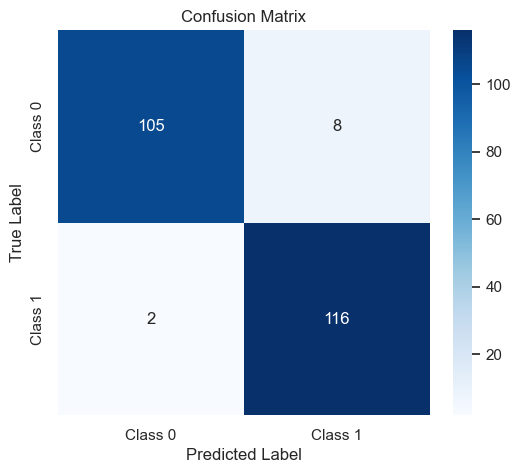

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get true and predicted labels from test set
y_true, y_pred = ture_and_pred_val(test_loader, model)  # 'model' should be the one you're evaluating

# Print classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Class {i}' for i in range(cm.shape[0])],
            yticklabels=[f'Class {i}' for i in range(cm.shape[0])])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## <b>17<span style='color:#e61227'>|</span> Feature Extraction</b>

In [38]:

# 1. --- Define Model ---
class CNN_Retino(nn.Module):
    def __init__(self, params):
        super(CNN_Retino, self).__init__()

        Cin = params["shape_in"][0]
        init_f = params["initial_filters"]
        num_fc1 = params["num_fc1"]
        num_classes = params["num_classes"]
        self.dropout_rate = params["dropout_rate"]

        self.conv1 = nn.Conv2d(Cin, init_f, kernel_size=3)
        self.conv2 = nn.Conv2d(init_f, 2 * init_f, kernel_size=3)
        self.conv3 = nn.Conv2d(2 * init_f, 4 * init_f, kernel_size=3)
        self.conv4 = nn.Conv2d(4 * init_f, 8 * init_f, kernel_size=3)

        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))  # Avoid hardcoding flatten shape
        self.fc1 = nn.Linear(8 * init_f, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)

    def forward(self, X, return_features=False):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)

        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)

        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)

        X = F.relu(self.conv4(X))
        X = F.max_pool2d(X, 2, 2)

        X = self.global_pool(X)           # [batch, channels, 1, 1]
        X = X.view(X.size(0), -1)         # Flatten
        features = F.relu(self.fc1(X))

        if return_features:
            return features

        X = F.dropout(features, self.dropout_rate)
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>17.1 |</span></b>Feature Extraction Function</b></p>
</div>

In [39]:

# 2. --- Feature Extraction Function ---
def extract_features(model, dataloader, device):
    model.eval()
    feature_list = []
    label_list = []

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc="Extracting features"):
            inputs = inputs.to(device)
            labels = labels.to(device)
            features = model(inputs, return_features=True)
            feature_list.append(features.cpu())
            label_list.append(labels.cpu())

    all_features = torch.cat(feature_list, dim=0)
    all_labels = torch.cat(label_list, dim=0)
    return all_features, all_labels

# 3. --- Setup Model and Device ---
params = {
    "shape_in": (3, 224, 224),
    "initial_filters": 32,
    "num_fc1": 128,
    "num_classes": 5,
    "dropout_rate": 0.5
}

model = CNN_Retino(params)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 4. --- Try to Load Pretrained Weights (Optional) ---
weight_path = "CNN_Retino.pth"  # Change path if needed

# try:
#     model.load_state_dict(torch.load(weight_path, map_location=device))
#     print(f"Loaded weights from {weight_path}")
# except FileNotFoundError:
#     print(f"⚠️ File '{weight_path}' not found. Continuing with untrained model.")

# 5. --- Extract Features ---
# Assuming train_loader, val_loader, test_loader are already defined
train_features, train_labels = extract_features(model, train_loader, device)
val_features, val_labels = extract_features(model, val_loader, device)
test_features, test_labels = extract_features(model, test_loader, device)

print("Train feature shape:", train_features.shape)
print("Train label shape:", train_labels.shape)



Extracting features:   0%|          | 0/33 [00:00<?, ?it/s]

Extracting features:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting features:   0%|          | 0/4 [00:00<?, ?it/s]

Train feature shape: torch.Size([2076, 128])
Train label shape: torch.Size([2076])


Running t-SNE...


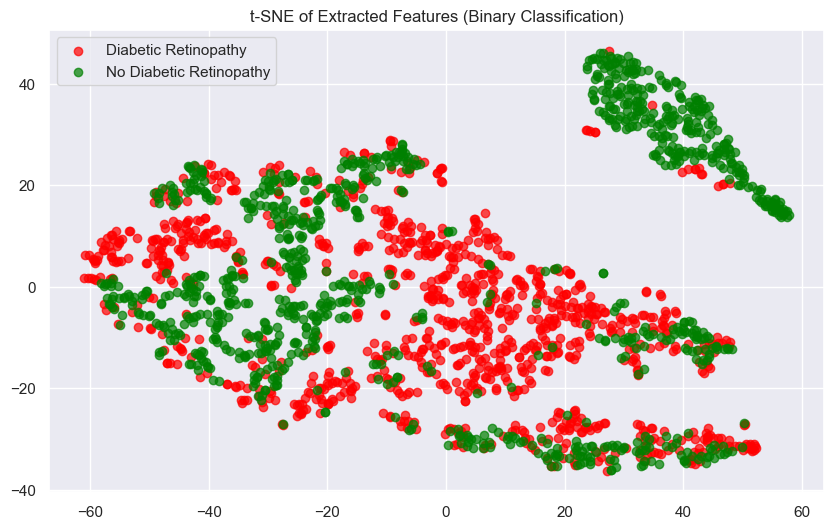

In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Run t-SNE on extracted features
print("Running t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_2d = tsne.fit_transform(train_features)

# Create a color map and label map
color_map = {0: 'red', 1: 'green'}
label_map = {0: 'Diabetic Retinopathy', 1: 'No Diabetic Retinopathy'}
colors = [color_map[label.item()] for label in train_labels]

# Plot
plt.figure(figsize=(10, 6))
for label_value in [0, 1]:
    idx = train_labels == label_value
    plt.scatter(
        features_2d[idx, 0],
        features_2d[idx, 1],
        c=color_map[label_value],
        label=label_map[label_value],
        alpha=0.7
    )

plt.title("t-SNE of Extracted Features (Binary Classification)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid(True)
plt.show()


## <b>18<span style='color:#e61227'>|</span> Activation Function</b>

In [ ]:
# Define CNN_Retino to accept activation_fn
class CNN_Retino(nn.Module):
    def __init__(self, params, activation_fn):
        super(CNN_Retino, self).__init__()
        Cin, Hin, Win = params["shape_in"]
        init_f = params["initial_filters"]
        num_fc1 = params["num_fc1"]
        num_classes = params["num_classes"]
        self.dropout_rate = params["dropout_rate"]
        self.activation_fn = activation_fn

        self.conv1 = nn.Conv2d(Cin, init_f, kernel_size=3)
        self.conv2 = nn.Conv2d(init_f, 2 * init_f, kernel_size=3)
        self.conv3 = nn.Conv2d(2 * init_f, 4 * init_f, kernel_size=3)
        self.conv4 = nn.Conv2d(4 * init_f, 8 * init_f, kernel_size=3)

        # Calculate flattened size dynamically
        with torch.no_grad():
            dummy_input = torch.zeros(1, Cin, Hin, Win)
            x = F.max_pool2d(self.activation_fn(self.conv1(dummy_input)), 2)
            x = F.max_pool2d(self.activation_fn(self.conv2(x)), 2)
            x = F.max_pool2d(self.activation_fn(self.conv3(x)), 2)
            x = F.max_pool2d(self.activation_fn(self.conv4(x)), 2)
            self.num_flatten = x.view(1, -1).size(1)

        self.fc1 = nn.Linear(self.num_flatten, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)

    def forward(self, x):
        x = F.max_pool2d(self.activation_fn(self.conv1(x)), 2)
        x = F.max_pool2d(self.activation_fn(self.conv2(x)), 2)
        x = F.max_pool2d(self.activation_fn(self.conv3(x)), 2)
        x = F.max_pool2d(self.activation_fn(self.conv4(x)), 2)
        x = x.view(-1, self.num_flatten)
        x = self.activation_fn(self.fc1(x))
        x = F.dropout(x, self.dropout_rate, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


## <b>19<span style='color:#e61227'>|</span> Training Function</b>

In [ ]:
def train_model(model, optimizer, train_loader, val_loader, epochs=10):
    model.train()
    train_acc_list = []
    val_acc_list = []

    for epoch in range(epochs):
        correct = 0
        total = 0

        for data, target in train_loader:
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

        train_accuracy = 100 * correct / total
        train_acc_list.append(train_accuracy)

        # Validation loop
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()
        val_accuracy = 100 * correct / total
        val_acc_list.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%")

    return train_acc_list, val_acc_list


## <b>20<span style='color:#e61227'>|</span> Define params for Each Activation Variant</b>

In [ ]:
common_params = {
    "shape_in": (3, 255, 255),   # Adjust if needed
    "initial_filters": 32,
    "num_fc1": 128,
    "num_classes": 2,
    "dropout_rate": 0.3
}

params_relu = common_params.copy()
params_relu["activation"] = F.relu

params_sigmoid = common_params.copy()
params_sigmoid["activation"] = torch.sigmoid

params_tanh = common_params.copy()
params_tanh["activation"] = torch.tanh


## <b>21<span style='color:#e61227'>|</span> Train All Three Models and Record Accuracy</b>

In [ ]:
# Ensure params_relu, train_loader, test_loader are defined

# Move model to CUDA using .to(device)
model_relu = CNN_Retino(params_relu, activation_fn=F.relu).to(device)
model_sigmoid = CNN_Retino(params_sigmoid, activation_fn=torch.sigmoid).to(device)
model_tanh = CNN_Retino(params_tanh, activation_fn=torch.tanh).to(device)

# Optimizers
optimizer_relu = torch.optim.Adam(model_relu.parameters(), lr=0.001)
optimizer_sigmoid = torch.optim.Adam(model_sigmoid.parameters(), lr=0.001)
optimizer_tanh = torch.optim.Adam(model_tanh.parameters(), lr=0.001)

# Train the models (on GPU)
relu_train_acc, relu_val_acc = train_model(model_relu, optimizer_relu, train_loader, test_loader, epochs=10)
sigmoid_train_acc, sigmoid_val_acc = train_model(model_sigmoid, optimizer_sigmoid, train_loader, test_loader, epochs=10)
tanh_train_acc, tanh_val_acc = train_model(model_tanh, optimizer_tanh, train_loader, test_loader, epochs=10)


Epoch 1/10, Train Acc: 70.42%, Val Acc: 85.28%
Epoch 2/10, Train Acc: 86.27%, Val Acc: 85.71%
Epoch 3/10, Train Acc: 88.25%, Val Acc: 90.04%
Epoch 4/10, Train Acc: 88.68%, Val Acc: 86.15%
Epoch 5/10, Train Acc: 90.27%, Val Acc: 90.48%
Epoch 6/10, Train Acc: 91.86%, Val Acc: 90.91%
Epoch 7/10, Train Acc: 92.34%, Val Acc: 94.37%
Epoch 8/10, Train Acc: 92.87%, Val Acc: 91.77%
Epoch 9/10, Train Acc: 91.86%, Val Acc: 93.07%
Epoch 10/10, Train Acc: 92.82%, Val Acc: 93.94%
Epoch 1/10, Train Acc: 50.10%, Val Acc: 48.92%
Epoch 2/10, Train Acc: 49.42%, Val Acc: 51.08%
Epoch 3/10, Train Acc: 51.25%, Val Acc: 48.92%
Epoch 4/10, Train Acc: 50.87%, Val Acc: 51.08%
Epoch 5/10, Train Acc: 49.42%, Val Acc: 48.92%
Epoch 6/10, Train Acc: 50.77%, Val Acc: 51.08%
Epoch 7/10, Train Acc: 49.71%, Val Acc: 48.92%
Epoch 8/10, Train Acc: 51.16%, Val Acc: 51.08%
Epoch 9/10, Train Acc: 51.35%, Val Acc: 48.92%
Epoch 10/10, Train Acc: 49.81%, Val Acc: 48.92%
Epoch 1/10, Train Acc: 52.50%, Val Acc: 48.92%
Epoch 2/10,

## <b>22<span style='color:#e61227'>|</span> Plot Comparison Graph for Relu, Sigmoid and Tanh Activation Function</b>

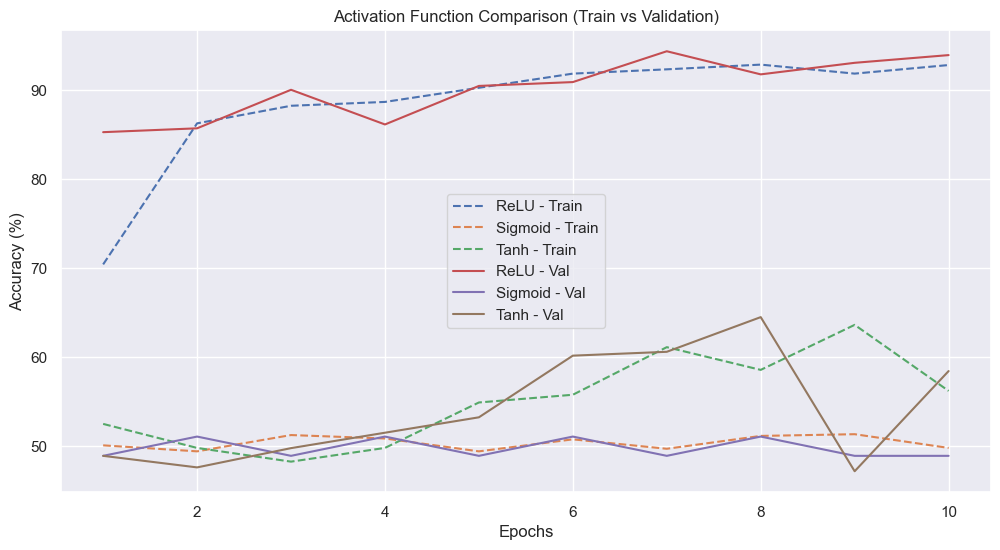

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 11)

plt.figure(figsize=(12,6))

# Training accuracy
plt.plot(epochs, relu_train_acc, label="ReLU - Train", linestyle='--')
plt.plot(epochs, sigmoid_train_acc, label="Sigmoid - Train", linestyle='--')
plt.plot(epochs, tanh_train_acc, label="Tanh - Train", linestyle='--')

# Validation accuracy
plt.plot(epochs, relu_val_acc, label="ReLU - Val")
plt.plot(epochs, sigmoid_val_acc, label="Sigmoid - Val")
plt.plot(epochs, tanh_val_acc, label="Tanh - Val")

plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Activation Function Comparison (Train vs Validation)")
plt.legend()
plt.grid(True)
plt.show()


## <b>23<span style='color:#e61227'>|</span> RNN Architectures</b>

In [ ]:
class RNN_Retino(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate):
        super(RNN_Retino, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 128)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # x shape: [batch_size, C, H, W] → flatten as sequence
        x = x.view(x.size(0), x.size(2), -1)  # [B, H, W*C]
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # Take the last time step
        out = F.relu(self.fc1(out))
        out = self.dropout(out)
        out = self.fc2(out)
        return F.log_softmax(out, dim=1)


## <b>24<span style='color:#e61227'>|</span> LSTM Architectures</b>

In [ ]:
class LSTM_Retino(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate):
        super(LSTM_Retino, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 128)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), x.size(2), -1)  # [B, H, W*C]
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = F.relu(self.fc1(out))
        out = self.dropout(out)
        out = self.fc2(out)
        return F.log_softmax(out, dim=1)


## <b>25<span style='color:#e61227'>|</span> Training Function</b>

In [ ]:
def train_model(model, optimizer, train_loader, val_loader, epochs=10):
    train_acc_list = []
    val_acc_list = []

    for epoch in range(epochs):
        model.train()
        correct = total = 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        # Validation
        model.eval()
        correct = total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        val_acc = 100 * correct / total
        val_acc_list.append(val_acc)

        print(f"Epoch {epoch+1}/{epochs}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

    return train_acc_list, val_acc_list


## <b>26<span style='color:#e61227'>|</span> Train All Three Models & Store Metrics</b>

In [ ]:
import torch.nn.functional as F

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
params = {
    "shape_in": (3, 255, 255),
    "initial_filters": 32,
    "num_fc1": 128,
    "num_classes": 2,
    "dropout_rate": 0.3
}
input_size = 255 * 3
hidden_size = 256
dropout_rate = 0.3

# Instantiate models with the activation function
cnn_model = CNN_Retino(params, activation_fn=F.relu).to(device)
rnn_model = RNN_Retino(input_size, hidden_size, 2, dropout_rate).to(device)
lstm_model = LSTM_Retino(input_size, hidden_size, 2, dropout_rate).to(device)

# Optimizers
optimizer_cnn = torch.optim.Adam(cnn_model.parameters(), lr=0.001)
optimizer_rnn = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
optimizer_lstm = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

# Train models
cnn_train_acc, cnn_val_acc = train_model(cnn_model, optimizer_cnn, train_loader, test_loader)

with torch.backends.cudnn.flags(enabled=True, deterministic=True, benchmark=False):
    rnn_train_acc, rnn_val_acc = train_model(rnn_model, optimizer_rnn, train_loader, test_loader)
    lstm_train_acc, lstm_val_acc = train_model(lstm_model, optimizer_lstm, train_loader, test_loader)


Epoch 1/10, Train Acc: 64.40%, Val Acc: 86.15%
Epoch 2/10, Train Acc: 86.80%, Val Acc: 86.15%
Epoch 3/10, Train Acc: 89.26%, Val Acc: 93.07%
Epoch 4/10, Train Acc: 90.70%, Val Acc: 90.91%
Epoch 5/10, Train Acc: 92.49%, Val Acc: 91.34%
Epoch 6/10, Train Acc: 91.86%, Val Acc: 90.48%
Epoch 7/10, Train Acc: 92.49%, Val Acc: 93.51%
Epoch 8/10, Train Acc: 91.96%, Val Acc: 91.77%
Epoch 9/10, Train Acc: 92.39%, Val Acc: 93.51%
Epoch 10/10, Train Acc: 92.49%, Val Acc: 91.34%
Epoch 1/10, Train Acc: 49.57%, Val Acc: 51.08%
Epoch 2/10, Train Acc: 51.93%, Val Acc: 48.92%
Epoch 3/10, Train Acc: 49.42%, Val Acc: 48.92%
Epoch 4/10, Train Acc: 50.58%, Val Acc: 51.08%
Epoch 5/10, Train Acc: 50.58%, Val Acc: 51.08%
Epoch 6/10, Train Acc: 50.72%, Val Acc: 48.92%
Epoch 7/10, Train Acc: 49.04%, Val Acc: 61.47%
Epoch 8/10, Train Acc: 48.70%, Val Acc: 48.92%
Epoch 9/10, Train Acc: 49.71%, Val Acc: 48.92%
Epoch 10/10, Train Acc: 48.80%, Val Acc: 51.08%
Epoch 1/10, Train Acc: 51.30%, Val Acc: 48.92%
Epoch 2/10,

## <b>27<span style='color:#e61227'>|</span> Plot Comparison Graph of Relu_CNN, RNN and LSTM</b>

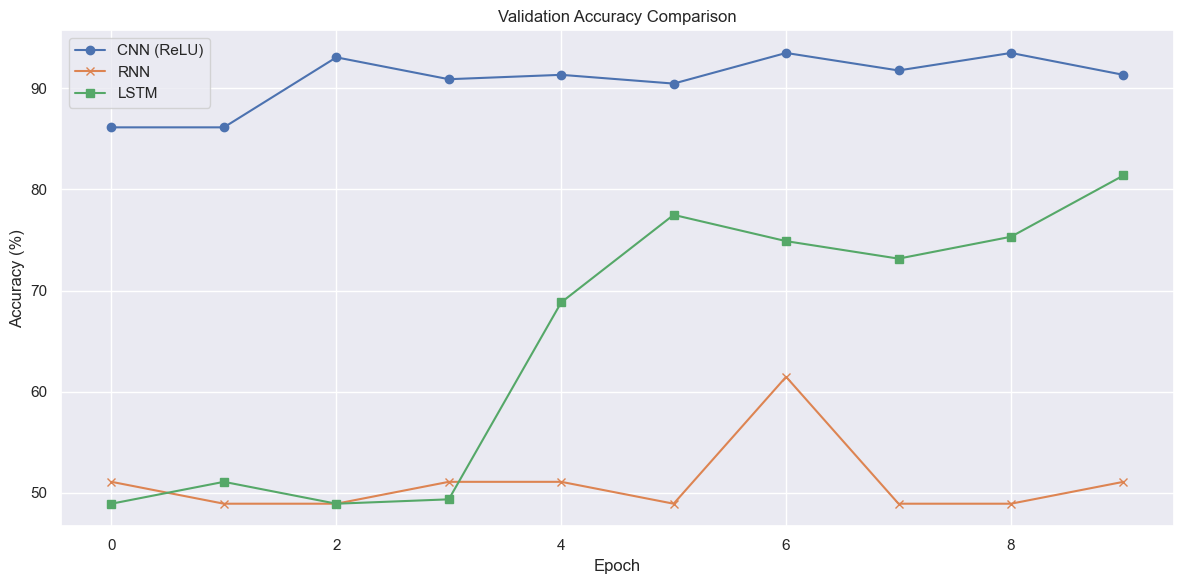

In [ ]:
import matplotlib.pyplot as plt

epochs = len(cnn_train_acc)

plt.figure(figsize=(12, 6))
plt.plot(range(epochs), cnn_val_acc, label="CNN (ReLU)", marker='o')
plt.plot(range(epochs), rnn_val_acc, label="RNN", marker='x')
plt.plot(range(epochs), lstm_val_acc, label="LSTM", marker='s')

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
